### Import Libraries

In [505]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score


In [506]:
sns.set_style('darkgrid')

### Load Dataset

In [507]:
# Load csv
df = pd.read_csv("data/day.csv")

In [508]:
# Shape of dataframe
df.shape

(730, 16)

In [509]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Data understanding and visualization

In [510]:
# Removing unnecessary columns
columns_to_drop = ["instant", "dteday", "casual", "registered"]
df.drop(columns_to_drop, axis=1, inplace=True)

In [511]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


We can see no column have null value, so data seems correct here.

In [512]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [513]:
# Categorical Variable
categorical_columns = ["season", "yr", "mnth", "holiday", "workingday", "weekday", "weathersit"]

In [514]:
# Continuous Variable
continuous_columns = ["temp", "atemp", "hum", "windspeed", "cnt"]

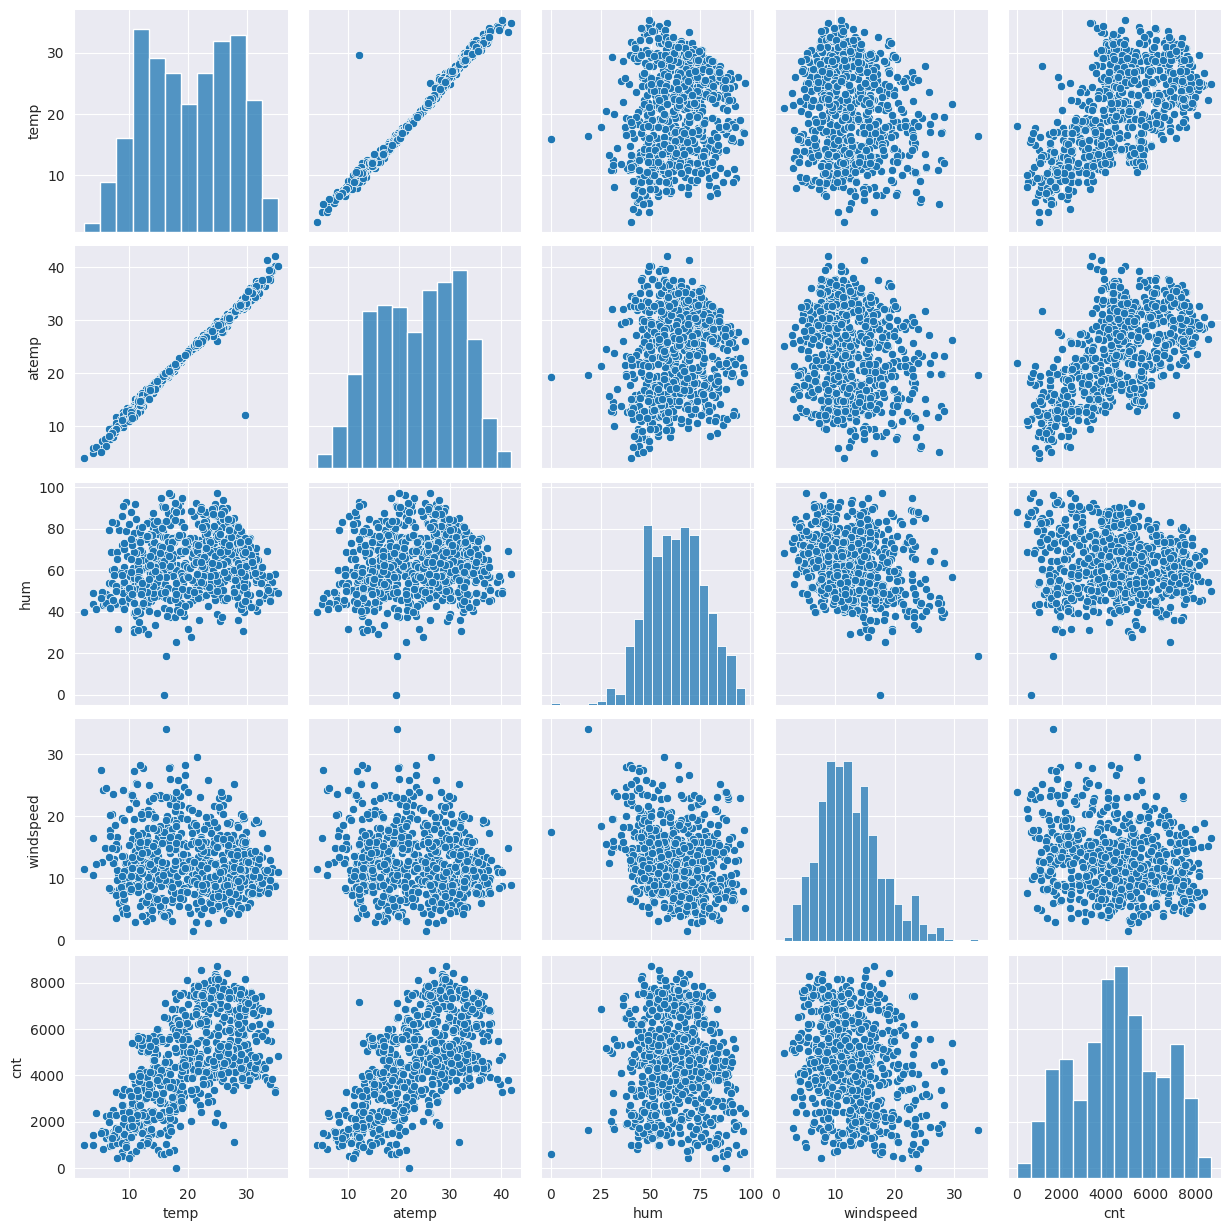

In [515]:
sns.pairplot(df[continuous_columns])
plt.show()

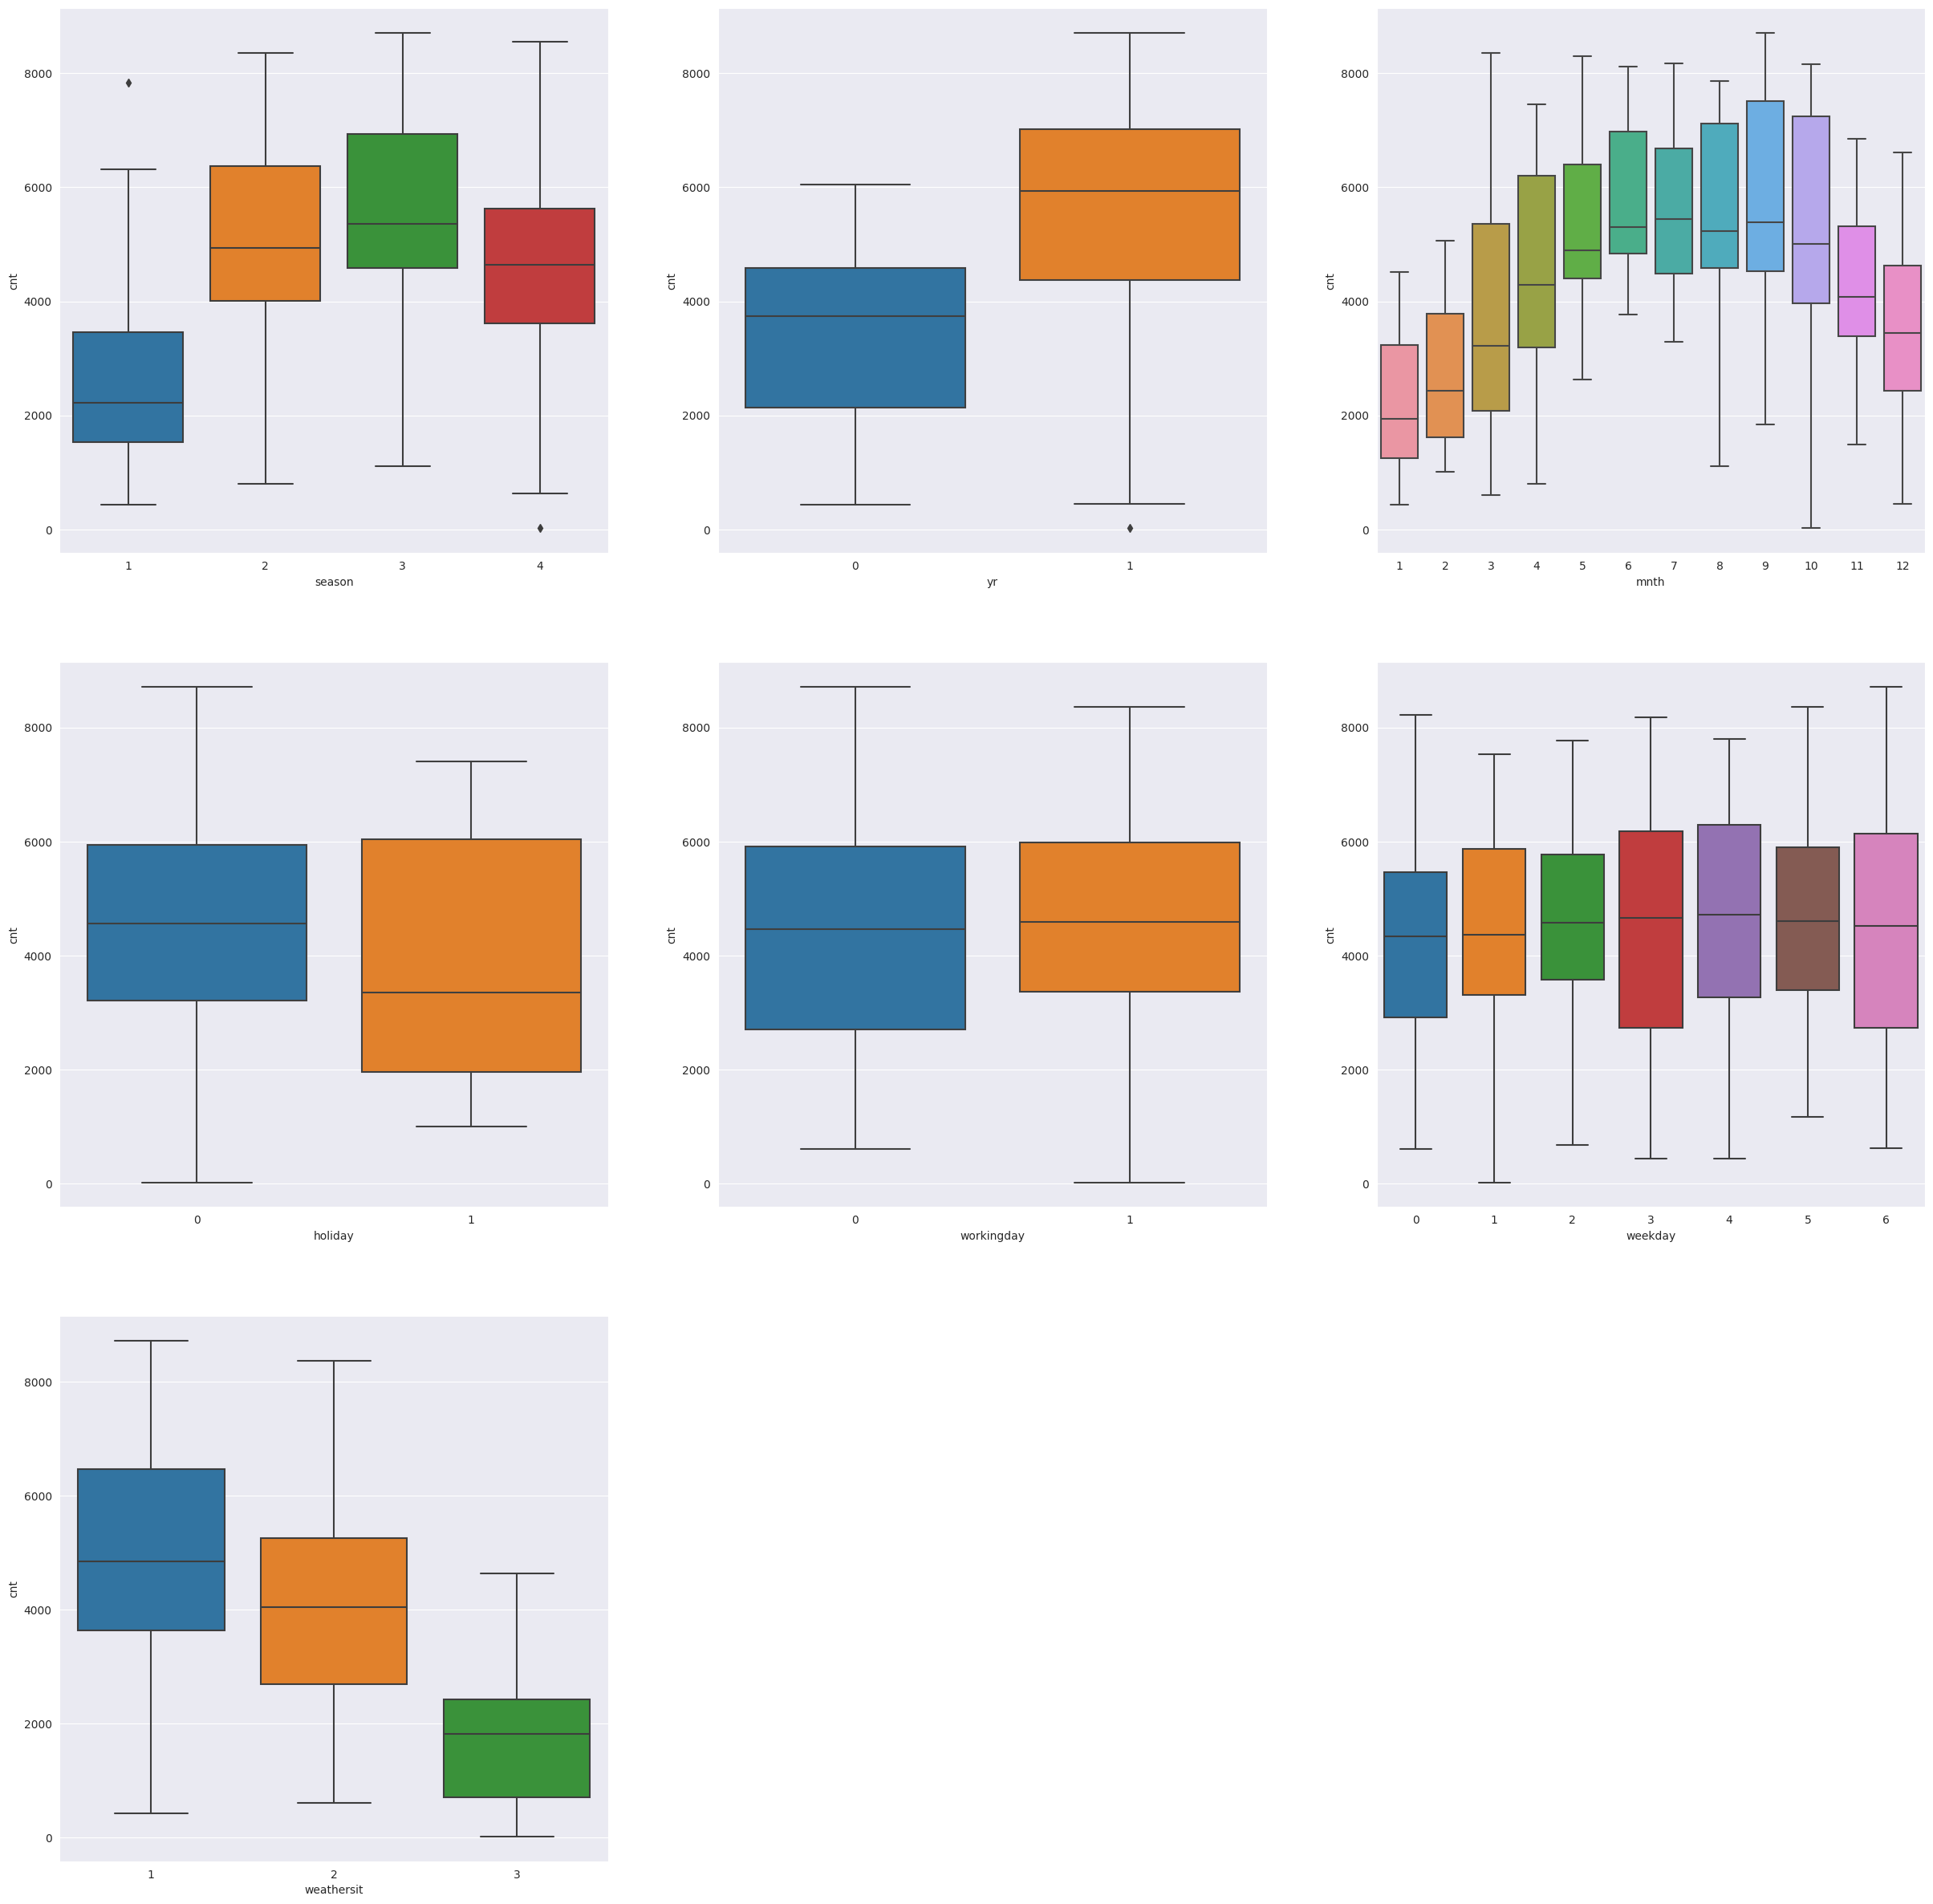

In [516]:
plt.figure(figsize=(30, 30))
for i in range(0, len(categorical_columns)): 
    plt.subplot(3,3,i+1)
    sns.boxplot(x=categorical_columns[i], y="cnt", data=df)
plt.show()

### Data Preparation

#### Split the train and test 

In [517]:
df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
season_status = pd.get_dummies(df['season'], drop_first = True)
df = pd.concat([df, season_status], axis = 1)

df.mnth = df.mnth.map({1:'JAN',2:'FEB',3:'MAR',4:'APR',5:'MAY',6:'JUNE',7:'JULY',8:'AUG',9:'SEP',10:'OCT',11:'NOV',12:'DEC'})
month = pd.get_dummies(df['mnth'], drop_first = True)
df = pd.concat([df, month], axis = 1)

df.weekday = df.weekday.map({0:'SUN',1:'MON',2:'TUE',3:'WED',4:'THUR',5:'FRI',6:'SAT'})
weekday_status = pd.get_dummies(df['weekday'], drop_first = True)
df = pd.concat([df, weekday_status], axis = 1)

df.weathersit = df.weathersit.map({1:'clear',2:'mist',3:'Light_snow',4:'Heavy_rain'})
weathersit_status = pd.get_dummies(df['weathersit'], drop_first = True)
df = pd.concat([df, weathersit_status], axis = 1)

df.drop(columns=['season','mnth','weekday','weathersit'], inplace=True)

In [518]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   spring      730 non-null    uint8  
 9   summer      730 non-null    uint8  
 10  winter      730 non-null    uint8  
 11  AUG         730 non-null    uint8  
 12  DEC         730 non-null    uint8  
 13  FEB         730 non-null    uint8  
 14  JAN         730 non-null    uint8  
 15  JULY        730 non-null    uint8  
 16  JUNE        730 non-null    uint8  
 17  MAR         730 non-null    uint8  
 18  MAY         730 non-null    uint8  
 19  NOV         730 non-null    u

In [519]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,OCT,SEP,MON,SAT,SUN,THUR,TUE,WED,clear,mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,1,0


In [520]:
df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


#### Rescaling the features - MinMax Scaling

In [521]:
# Instantiaite the object
scaler = MinMaxScaler()

In [522]:
# Fit on data - continuous_columns
df_train[continuous_columns] = scaler.fit_transform(df_train[continuous_columns])

In [523]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,OCT,SEP,MON,SAT,SUN,THUR,TUE,WED,clear,mist
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,0,1


#### Training the Model

In [524]:
y_train = df_train.pop('cnt')
X_train = df_train

#### Building our model

In [525]:
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'spring', 'summer', 'winter', 'AUG', 'DEC', 'FEB', 'JAN', 'JULY',
       'JUNE', 'MAR', 'MAY', 'NOV', 'OCT', 'SEP', 'MON', 'SAT', 'SUN', 'THUR',
       'TUE', 'WED', 'clear', 'mist'],
      dtype='object')

###### RFE

In [526]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step=15)
rfe = rfe.fit(X_train, y_train)

In [527]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('AUG', False, 2),
 ('DEC', True, 1),
 ('FEB', False, 2),
 ('JAN', True, 1),
 ('JULY', False, 2),
 ('JUNE', False, 2),
 ('MAR', False, 2),
 ('MAY', False, 2),
 ('NOV', False, 2),
 ('OCT', False, 2),
 ('SEP', True, 1),
 ('MON', False, 2),
 ('SAT', False, 2),
 ('SUN', False, 2),
 ('THUR', False, 2),
 ('TUE', False, 2),
 ('WED', False, 2),
 ('clear', True, 1),
 ('mist', True, 1)]

In [528]:
# Columns where rfe selected
selected_columns = X_train.columns[rfe.support_]

In [529]:
# Columns where rfe not selected
not_selected_columns = X_train.columns[~rfe.support_]

In [530]:
selected_columns

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'DEC', 'JAN', 'SEP', 'clear', 'mist'],
      dtype='object')

In [531]:
# creating X_train dataframe using RFE selected columns
X_train_rfe = X_train[selected_columns]

In [532]:
# Adding constant variable
X_train = sm.add_constant(X_train_rfe)

In [533]:
lm = sm.OLS(y_train, X_train).fit()

In [534]:
# Summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     186.6
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          4.12e-187
Time:                        16:03:49   Log-Likelihood:                 507.38
No. Observations:                 510   AIC:                            -984.8
Df Residuals:                     495   BIC:                            -921.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0465      0.048      0.978      0.3

`atemp` is insignificant in presence of other variable we can drop

In [535]:
X_train_new = X_train_rfe.drop(["atemp"], axis=1)

Rebuilding model without `atemp`

In [536]:
X_train = sm.add_constant(X_train_new)

In [537]:
lm = sm.OLS(y_train, X_train).fit()

In [542]:
# Summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.7
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          4.79e-189
Time:                        16:03:52   Log-Likelihood:                 506.42
No. Observations:                 510   AIC:                            -986.8
Df Residuals:                     497   BIC:                            -931.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0425      0.047      0.896      0.3

`DEC` is insignificant in presence of other variable we can drop

In [539]:
X_train_new = X_train_new.drop(["DEC"], axis=1)

In [540]:
X_train = sm.add_constant(X_train_new)

In [541]:
lm = sm.OLS(y_train, X_train).fit()

In [543]:
# Summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.7
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          4.79e-189
Time:                        16:04:08   Log-Likelihood:                 506.42
No. Observations:                 510   AIC:                            -986.8
Df Residuals:                     497   BIC:                            -931.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0425      0.047      0.896      0.3

In [544]:
X_train_new = X_train_new.drop(["spring"], axis=1)
X_train = sm.add_constant(X_train_new)
lm = sm.OLS(y_train, X_train).fit()
# Summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     235.9
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          1.85e-189
Time:                        16:04:54   Log-Likelihood:                 504.57
No. Observations:                 510   AIC:                            -985.1
Df Residuals:                     498   BIC:                            -934.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0070      0.044      0.159      0.8

In [545]:
# Calculate VIFs for new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif


,Features,VIF
3,hum,19.29
2,temp,11.14
9,clear,10.63
10,mist,7.70
4,windspeed,4.12
0,yr,2.07
6,winter,1.96
5,summer,1.70
7,JAN,1.65
8,SEP,1.22


In [546]:
X_train_new = X_train_new.drop(["hum"], axis=1)
X_train = sm.add_constant(X_train_new)
lm = sm.OLS(y_train, X_train).fit()
# Summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.0
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          2.06e-186
Time:                        16:05:39   Log-Likelihood:                 494.49
No. Observations:                 510   AIC:                            -967.0
Df Residuals:                     499   BIC:                            -920.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1323      0.031     -4.230      0.0

In [547]:
# Calculate VIFs for new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
8,clear,9.09
2,temp,8.15
9,mist,5.29
3,windspeed,4.05
0,yr,2.07
4,summer,1.67
5,winter,1.61
6,JAN,1.52
7,SEP,1.20
1,holiday,1.04


##### Residual Analysis

In [548]:
y_train_cnt = lm.predict(X_train)

/home/siddhant/Playground/study/AIML/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

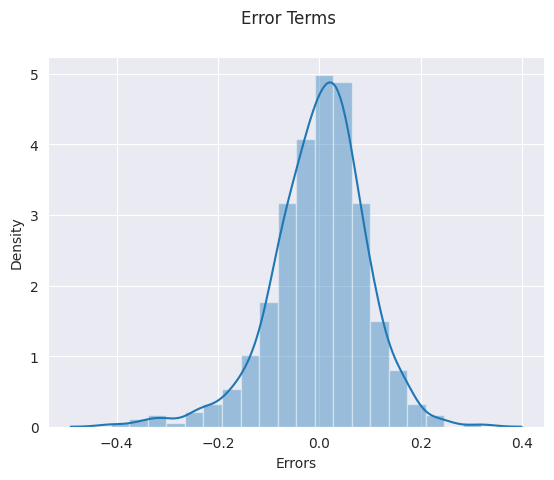

In [549]:
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins=20)
fig.suptitle("Error Terms")
plt.xlabel("Errors")

##### Making Predictions


In [550]:
df_test[continuous_columns] = scaler.transform(df_test[continuous_columns])

In [551]:
# Dividing into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [552]:
# Now let's use our model to make predictions.

# Creating X_test_new
X_test_new = X_test[X_train_new.columns]

X_test = sm.add_constant(X_test_new)

In [553]:
# Making predictions
y_pred = lm.predict(X_test)

#### Model Evaluation

Text(0, 0.5, 'y_pred')

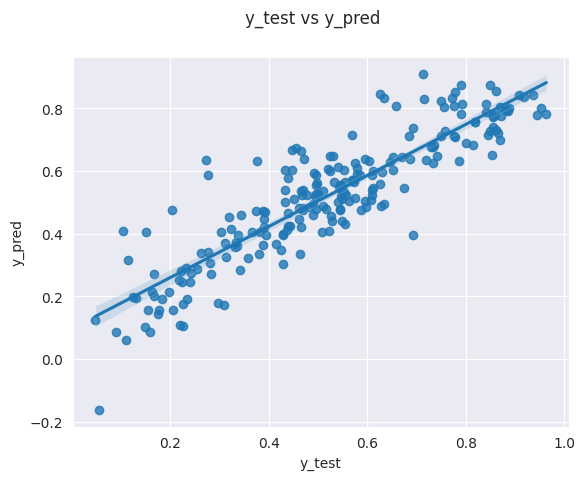

In [554]:
fig = plt.figure()
corr_plot = sns.regplot(x=y_test, y=y_pred)
fig.suptitle('y_test vs y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')

In [556]:
print("r2_score of train data: ", r2_score(y_true=y_train, y_pred=lm.predict(X_train)))
print("r2_score of test data: ", r2_score(y_true=y_test, y_pred=y_pred))

r2_score of train data:  0.8324770305005473
r2_score of test data:  0.7920075467344522
